# Case study - Simulating the simplicial Kuramoto model

In [1]:
import xgi
import numpy as np
import matplotlib.pyplot as plt

The simplicial Kuramoto model is a direct generalization of the Kuramoto model on graphs, which allows us to describe the interaction between oscillating simplices in a simplicial complex.

In order to simulate the simplicial Kuramoto model one needs an oriented simplicial complex. This can be achieved in XGI through the `SimplicialComplex` class together with a dictionary specifying the orientation of every simplex.

Let us start by defining a simple simplicial complex.

(<Axes: >, <matplotlib.collections.PathCollection at 0x7fae60d6c760>)

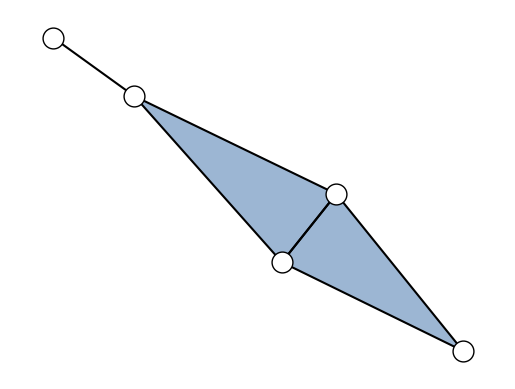

In [2]:
S = xgi.SimplicialComplex([[1, 2, 3], [2, 3, 4], [4, 5]])
xgi.draw(S)

In [3]:
S.edges.members()

[frozenset({1, 2, 3}),
 frozenset({2, 3, 4}),
 frozenset({4, 5}),
 frozenset({2, 4}),
 frozenset({1, 2}),
 frozenset({3, 4}),
 frozenset({2, 3}),
 frozenset({1, 3})]

We see above the list of simplices contained in the complex. We define the reference orientation of each one of them as the one given by the sorted list nodes in the simplex. The orientation will then be a boolean value: 0 for the reference orientation and 1 for the opposite one. For example, giving orientation 0 to {1,2,3} means that we are considering the oriented simplex [1,2,3] while 1 is associated to [2,1,3] (and all of the equivalent orientations).

We thus build a dictionary which associates the boolean orientation value to the ID of each (non singleton) simplex.

In [4]:
orientations = {idd: 0 for idd in list(S.edges.filterby("order", 1, mode="geq"))}

If we want to flip the orientation of, say, the face [1,2,3] we just do the following:

In [5]:
orientations[0] = 1

Having now an oriented simplicial complex we can run a simulation of the simplicial Kuramoto dynamics. First, however we need to define a few parameters:
- order : the order of the oscillating simplices (0 for nodes, 1 for edges, 2 for faces, ...);
- omega : the natural frequencies of each oscillator;
- theta0 : the initial phases of the oscillators;
- sigma : the strength of the interactions;
- T : the time horizon of the simulation;
- n_steps : the number of integration steps.

In [6]:
order = 1
n = len(S.edges.filterby("order", order))  # Number of oscillating simplices

omega = np.random.rand(n, 1)
theta0 = 2 * np.pi * np.random.rand(n, 1)

sigma = 0.4
T = 30
n_steps = 5000

We then simulate the dynamics and compute the simplicial order parameter with the two functions
- `simulate_simplicial_kuramoto`
- `compute_simplicial_order_parameter`

In [7]:
(
    theta,
    theta_minus,
    theta_plus,
    om1_dict,
    o_dict,
    op1_dict,
) = xgi.synchronization.simulate_simplicial_kuramoto(
    S, orientations, order, omega, sigma, theta0, T, n_steps, True
)

r = xgi.synchronization.compute_simplicial_order_parameter(theta_minus, theta_plus)

The output phases timeseries is contained in *theta* while *theta_minus* and *theta_plus* are, respectively, the projection of the dynamics onto lower order and higher order simplices.

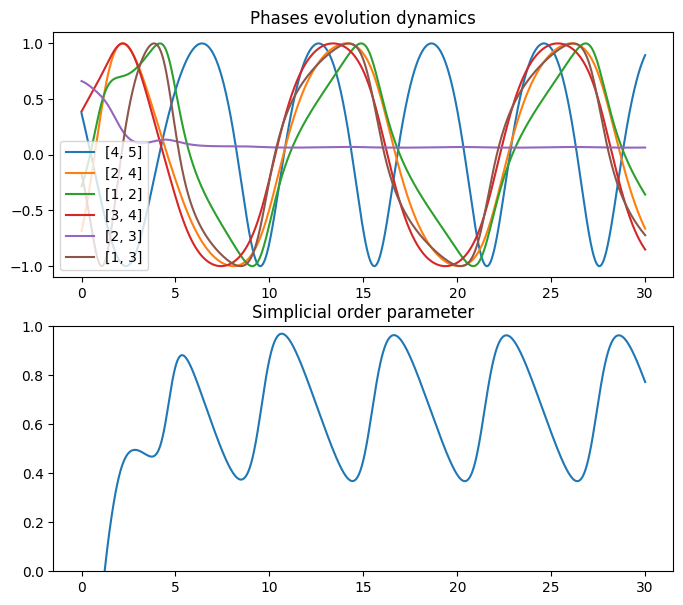

In [8]:
fig, axs = plt.subplots(2, 1)
fig.set_figheight(7)
fig.set_figwidth(8)

labels_list = [
    "[%s]" % ", ".join(map(str, list(S.edges.members()[idx])))
    for idx in list(o_dict.values())
]


axs[0].plot(np.linspace(0, T, n_steps), np.sin(np.transpose(theta)))
axs[0].set_title("Phases evolution dynamics")
axs[0].legend(labels_list)

axs[1].plot(np.linspace(0, T, n_steps), r)
axs[1].set_title("Simplicial order parameter")
axs[1].set_ylim((0, 1))

plt.show()